# CS 315 Project 1 Jaccard Index Analysis

Sophie Hwang, Tayae Rogers, Jenni Yu, Maya Lu-Heda, Catherine Foster, Jasmine Khuu

### 1. Extracting Data & Setting up Data Frames

In [1]:
import os, csv
import pandas as pd
import numpy as np

C:\Users\shhwa\AppData\Local\Temp\ipykernel_42516\1043464569.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
files = os.listdir("38") #input foldername
files.sort()

pairs = list(zip(files[:20], files[20:40]))
print(pairs)

[('38_Sec02Gr1Sc38Activ_CF_02-13-20-02_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-02_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-07_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-08_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-11_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-12_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-15_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-16_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-19_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-20_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-23_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-23_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-31_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr

In [3]:
def getAllValues(fn, age, column):
    with open(f"{age}/{fn}", encoding='utf8') as fin:
        dr = csv.DictReader(fin)
        metrics = [row[column] for row in dr]
    return metrics

In [4]:
def jaccard(lst1, lst2):
    return len(set(lst1).intersection(set(lst2)))/len(set(lst1).union(set(lst2)))

In [5]:
def getHashtagValues(fn, age, column):
    hashtagList = []
    hashtags = getAllValues(fn, age, column)
    for row in hashtags:
        if len(row) != 0:
            hashtagList += row.split(', ') #split & add individual hashtags into the list
    hashtagList = np.unique(hashtagList).tolist() #eliminate duplicate hashtags
    return hashtagList

In [126]:
scenarios = ['13_Maya', '18_Jenni', '23_Tayae', '28_Sophie', '33_Jasmine', '38_Catherine'] #age
author = pd.DataFrame()
music = pd.DataFrame()
hashtag = pd.DataFrame()

for age in scenarios:
    files = os.listdir(f"{age}")
    pairs = list(zip(files[:20], files[20:40]))
    print(age, "author")
    jaccardList = []
    for a1, c1 in pairs:
        authors1 = getAllValues(a1, age, "author")
        authors2 = getAllValues(c1, age, "author")
        jaccardList.append(jaccard(authors1, authors2))
    author[f'age_{age}'] = jaccardList
    print(age, "music")
    jaccardList = []
    for a1, c1 in pairs:
        music1 = getAllValues(a1, age, "music")
        music2 = getAllValues(c1, age, "music")
        jaccardList.append(jaccard(music1, music2))
    music[f'age_{age}'] = jaccardList
    print(age, "hashtag")
    jaccardList = []
    for a1, c1 in pairs:
        hashtag1 = getHashtagValues(a1, age, "hashtag")
        hashtag2 = getHashtagValues(c1, age, "hashtag")
        jaccardList.append(jaccard(hashtag1, hashtag2))
    hashtag[f'age_{age}'] = jaccardList

13_Maya author
13_Maya music
13_Maya hashtag
18_Jenni author
18_Jenni music
18_Jenni hashtag
23_Tayae author
23_Tayae music
23_Tayae hashtag
28_Sophie author
28_Sophie music
28_Sophie hashtag
33_Jasmine author
33_Jasmine music
33_Jasmine hashtag
38_Catherine author
38_Catherine music
38_Catherine hashtag


In [127]:
author.index = range(1, 21)

In [128]:
author

,age_13_Maya,age_18_Jenni,age_23_Tayae,age_28_Sophie,age_33_Jasmine,age_38_Catherine
1,0.298343,0.045802,0.279221,0.227979,0.010309,0.115578
2,0.051282,0.012903,0.112299,0.123656,0.023256,0.085271
3,0.051471,0.029703,0.089385,0.081731,0.037736,0.031447
4,0.022989,0.081633,0.062176,0.023697,0.019231,0.026786
5,0.000000,0.087805,0.070352,0.033654,0.051813,0.030612
6,0.082192,0.016304,0.017241,0.041026,0.111111,0.006061
7,0.031250,0.016667,0.048913,0.073059,0.044248,0.010989
8,0.028986,0.083770,0.027473,0.040404,0.049774,0.007299
9,0.051282,0.051020,0.056701,0.070352,0.030043,0.035088
10,0.023622,0.028169,0.043750,0.024038,0.065421,0.006849


In [9]:
music.index = range(1, 21)
music

,age_13,age_18,age_23,age_28,age_33,age_38
1,0.308989,0.061069,0.302013,0.235602,0.032086,0.103960
2,0.050420,0.026667,0.114754,0.138298,0.027907,0.085271
3,0.067669,0.039604,0.094444,0.087379,0.042254,0.043210
4,0.000000,0.094241,0.068063,0.029126,0.019231,0.017094
5,0.000000,0.096154,0.070000,0.049261,0.046154,0.052632
6,0.082759,0.021622,0.016393,0.047619,0.129213,0.012048
7,0.030303,0.017143,0.031579,0.074074,0.053571,0.011111
8,0.012346,0.087179,0.016484,0.036082,0.026667,0.021739
9,0.042373,0.045000,0.060000,0.064356,0.025000,0.035088
10,0.023256,0.032864,0.053254,0.028986,0.075472,0.013699


In [10]:
hashtag.index = range(1, 21)
hashtag

,age_13,age_18,age_23,age_28,age_33,age_38
1,0.363951,0.068337,0.324645,0.284314,0.079585,0.182674
2,0.092391,0.043619,0.158929,0.147793,0.067851,0.101828
3,0.122622,0.092705,0.104278,0.123016,0.112573,0.116832
4,0.070000,0.148976,0.090293,0.069021,0.049123,0.058104
5,0.043651,0.157303,0.100671,0.092424,0.099010,0.075949
6,0.148402,0.068100,0.040590,0.165085,0.189899,0.071429
7,0.019108,0.090726,0.074141,0.122837,0.116861,0.032680
8,0.040590,0.152632,0.096104,0.110891,0.062402,0.037559
9,0.116279,0.088608,0.105832,0.131661,0.099702,0.072072
10,0.085165,0.112188,0.056466,0.088629,0.138763,0.047697


In [29]:
age13 = pd.DataFrame()
age13['author'] = author.iloc[:, 0]  
age13['music'] = music.iloc[:, 0]
age13['hashtag'] = hashtag.iloc[:, 0]

age18 = pd.DataFrame()
age18['author'] = author.iloc[:, 1]  
age18['music'] = music.iloc[:, 1]
age18['hashtag'] = hashtag.iloc[:, 1]

age23 = pd.DataFrame()
age23['author'] = author.iloc[:, 2]  
age23['music'] = music.iloc[:, 2]
age23['hashtag'] = hashtag.iloc[:, 2]

age28 = pd.DataFrame()
age28['author'] = author.iloc[:, 3]  
age28['music'] = music.iloc[:, 3]
age28['hashtag'] = hashtag.iloc[:, 3]

age33 = pd.DataFrame()
age33['author'] = author.iloc[:, 4]  
age33['music'] = music.iloc[:, 4]
age33['hashtag'] = hashtag.iloc[:,4]

age38 = pd.DataFrame()
age38['author'] = author.iloc[:, 5]  
age38['music'] = music.iloc[:, 5]
age38['hashtag'] = hashtag.iloc[:, 5]

In [35]:
age38

,author,music,hashtag
1,0.115578,0.103960,0.182674
2,0.085271,0.085271,0.101828
3,0.031447,0.043210,0.116832
4,0.026786,0.017094,0.058104
5,0.030612,0.052632,0.075949
6,0.006061,0.012048,0.071429
7,0.010989,0.011111,0.032680
8,0.007299,0.021739,0.037559
9,0.035088,0.035088,0.072072
10,0.006849,0.013699,0.047697


### 2. Data Visualization

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
np.random.seed(444) # initializes our random number generator

AttributeError: 'Axes' object has no attribute 'tight_layout'

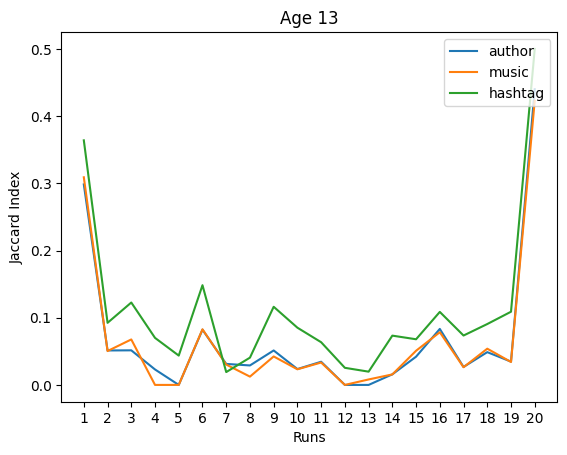

In [73]:
plt.style.use('default')

#fig, ax = plt.subplots(author)
ax1 = age13.plot()
ax1.set_xlabel('Runs')
ax1.set_xticks(range(1, 21))
ax1.set_ylabel('Jaccard Index')
ax1.set_title('Age 13')
ax1.legend(loc='upper right')
ax1.tight_layout()
#ax.plot(author)

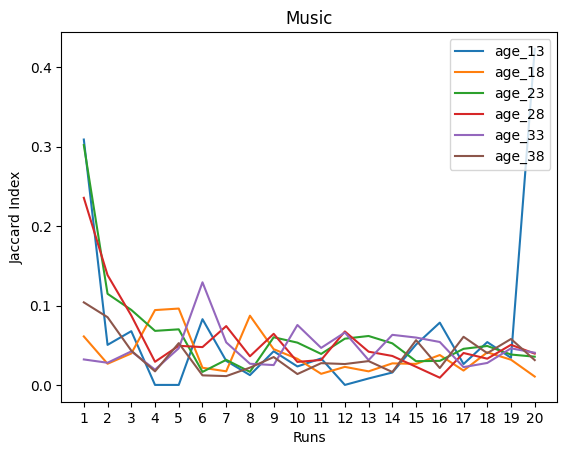

In [74]:
plt.style.use('default')

#fig, ax = plt.subplots(author)
ax2 = music.plot()
ax2.set_xlabel('Runs')
ax2.set_xticks(range(1, 21))
ax2.set_ylabel('Jaccard Index')
ax2.set_title('Music')
ax2.legend(loc='upper right')
fig.tight_layout()
#ax.plot(author)

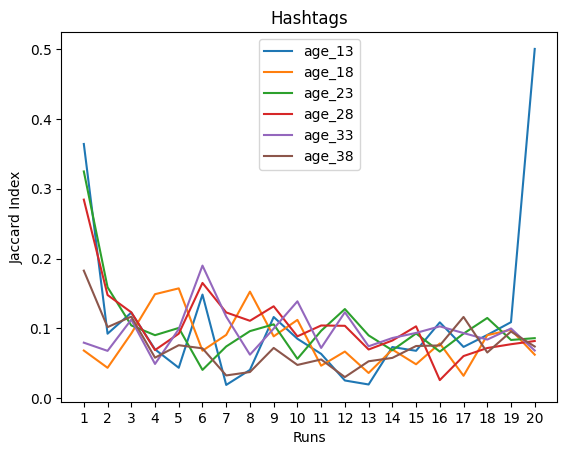

In [72]:
plt.style.use('default')

#fig, ax = plt.subplots(author)
ax3 = hashtag.plot()
ax3.set_xlabel('Runs')
ax3.set_xticks(range(1, 21))
ax3.set_ylabel('Jaccard Index')
ax3.set_title('Hashtags')
fig.tight_layout()
#ax.plot(author)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


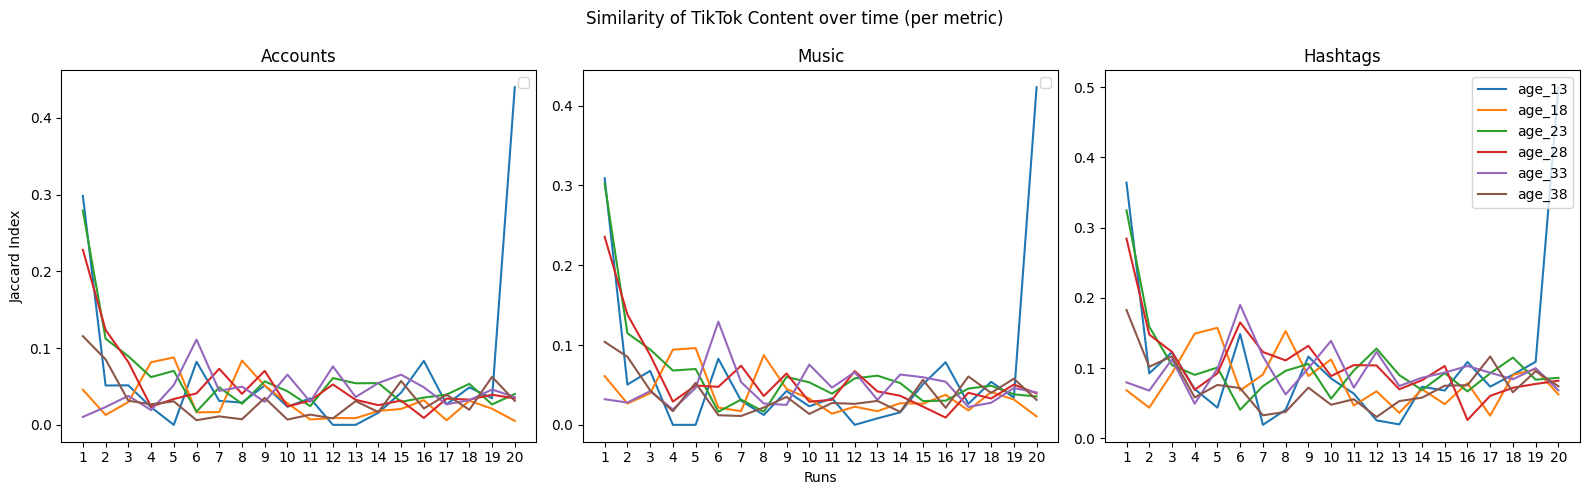

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle("Similarity of TikTok Content over time (per metric)")

# Add the existing subplots to the figure using add_axes
# ax1 = fig.add_axes()
# ax2 = fig.add_axes()
# ax3 = fig.add_axes()

ax1.plot(author.index, author['age_13'])
ax1.plot(author.index, author['age_18'])
ax1.plot(author.index, author['age_23'])
ax1.plot(author.index, author['age_28'])
ax1.plot(author.index, author['age_33'])
ax1.plot(author.index, author['age_38'])
ax1.set_xticks(range(1, 21))
ax1.set_ylabel('Jaccard Index')
ax1.set_title('Accounts')
ax1.legend(loc='upper right')

ax2.plot(music.index, music['age_13'])
ax2.plot(music.index, music['age_18'])
ax2.plot(music.index, music['age_23'])
ax2.plot(music.index, music['age_28'])
ax2.plot(music.index, music['age_33'])
ax2.plot(music.index, music['age_38'])
ax2.legend(['age_13', 'age_18', 'age_23', 'age_28', 'age_33', 'age_38'], loc="upper right")
ax2.set_xlabel('Runs')
ax2.set_xticks(range(1, 21))
ax2.set_title('Music')
ax2.legend(loc='upper right')

ax3.plot(hashtag.index, hashtag['age_13'])
ax3.plot(hashtag.index, hashtag['age_18'])
ax3.plot(hashtag.index, hashtag['age_23'])
ax3.plot(hashtag.index, hashtag['age_28'])
ax3.plot(hashtag.index, hashtag['age_33'])
ax3.plot(hashtag.index, hashtag['age_38'])
ax3.legend(['age_13', 'age_18', 'age_23', 'age_28', 'age_33', 'age_38'], loc="upper right")
ax3.set_xticks(range(1, 21))
ax3.set_title('Hashtags')


fig.tight_layout()

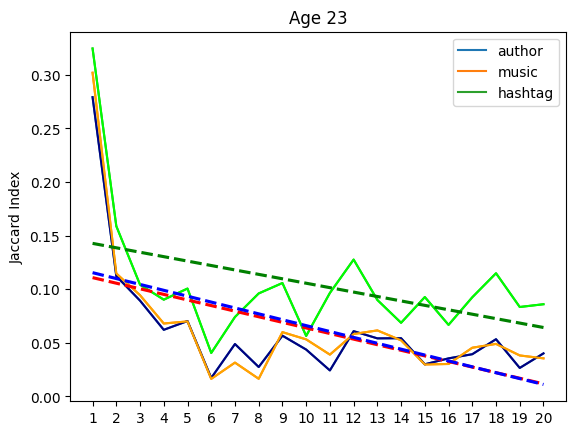

In [106]:
ax3 = age23.plot()

ax3.plot(age23.index, age23['author'], color = "navy")
ax3.plot(age23.index, age23['music'], color = "orange")
ax3.plot(age23.index, age23['hashtag'], color = "lime")
sns.regplot(x=age23.index, y=age23['author'], label = "author", color = "red", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax3)
sns.regplot(x=age23.index, y=age23['music'], label = "music", color = "blue", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax3)
sns.regplot(x=age23.index, y=age23['hashtag'], label = "hashtag", color = "green", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax3)
ax3.set_xticks(range(1, 21))
ax3.set_ylabel('Jaccard Index')
ax3.set_title('Age 23')
ax1.legend(loc='upper right')

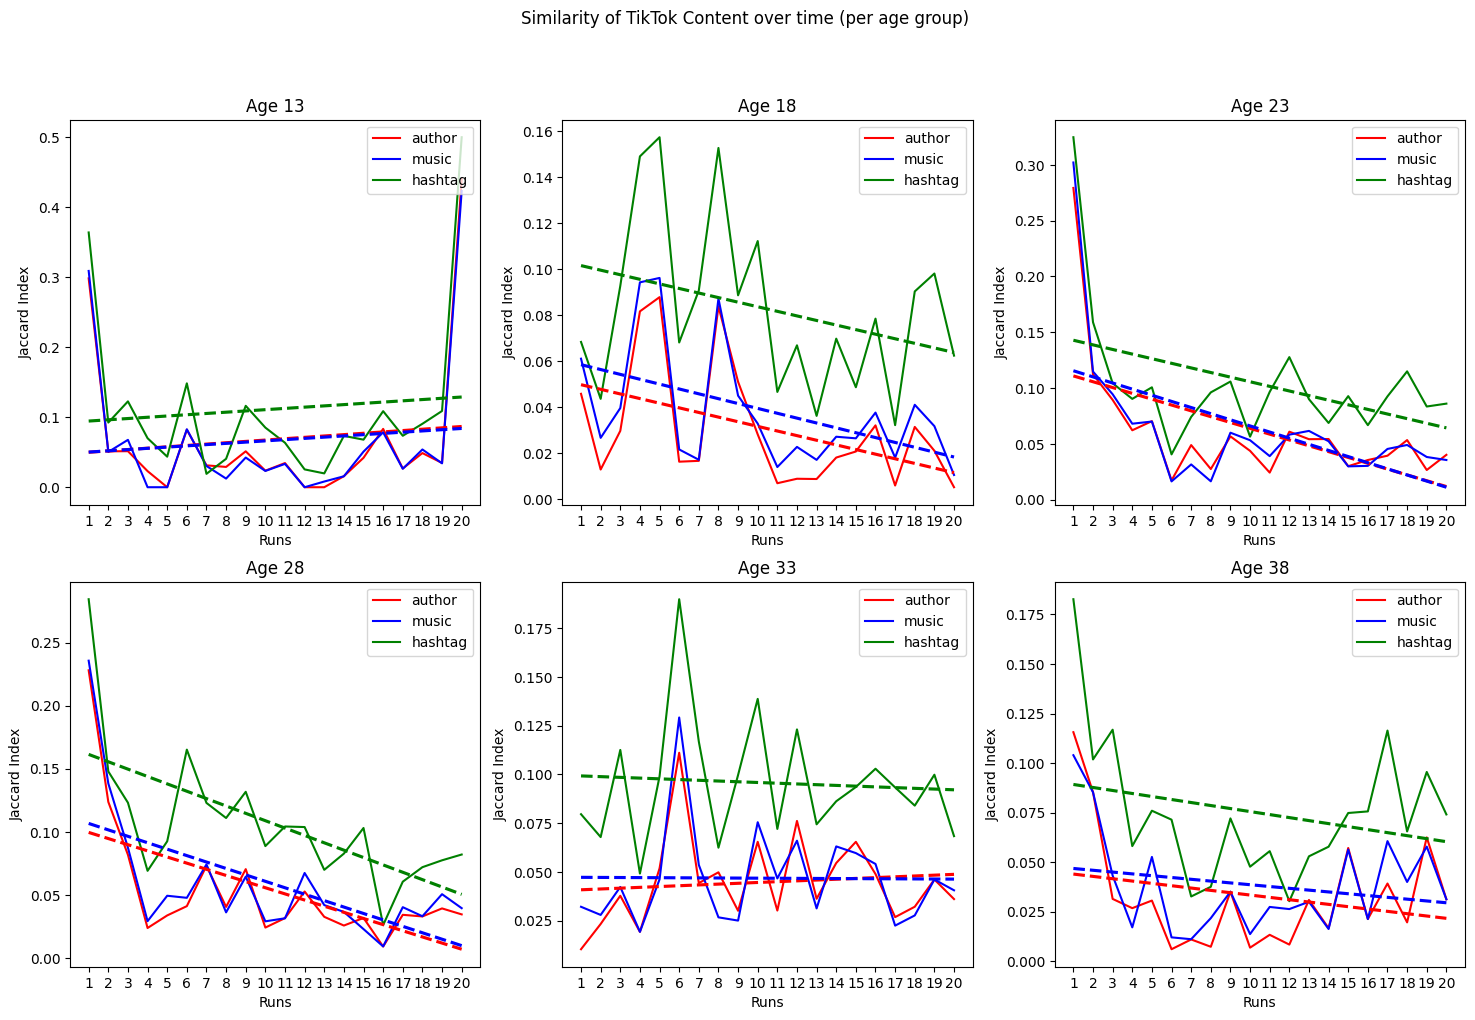

In [97]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 11))
fig.suptitle("Similarity of TikTok Content over time (per age group)")

ax1.plot(age13.index, age13['author'], label = "author", color = "red")
ax1.plot(age13.index, age13['music'], label = "music", color = "blue")
ax1.plot(age13.index, age13['hashtag'], label = "hashtag", color = "green")
sns.regplot(x = age13.index, y = age13['author'], color = "red", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax1)
sns.regplot(x = age13.index, y = age13['music'], color = "blue", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax1)
sns.regplot(x = age13.index, y = age13['hashtag'], color = "green", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax1)
ax1.set_xlabel('Runs')
ax1.set_xticks(range(1, 21))
ax1.set_ylabel('Jaccard Index')
ax1.set_title('Age 13')
ax1.legend(loc='upper right')

ax2.plot(age18.index, age18['author'], label = "author", color = "red")
ax2.plot(age18.index, age18['music'], label = "music", color = "blue")
ax2.plot(age18.index, age18['hashtag'], label = "hashtag", color = "green")
sns.regplot(x = age18.index, y = age18['author'], color = "red", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax2)
sns.regplot(x = age18.index, y = age18['music'], color = "blue", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax2)
sns.regplot(x = age18.index, y = age18['hashtag'], color = "green", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax2)
ax2.set_xticks(range(1, 21))
ax2.set_xlabel('Runs')
ax2.set_ylabel('Jaccard Index')
ax2.set_title('Age 18')
ax2.legend(loc='upper right')

ax3.plot(age23.index, age23['author'], label = "author", color = "red")
ax3.plot(age23.index, age23['music'], label = "music", color = "blue")
ax3.plot(age23.index, age23['hashtag'], label = "hashtag", color = "green")
sns.regplot(x = age23.index, y = age23['author'], color = "red", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax3)
sns.regplot(x = age23.index, y = age23['music'], color = "blue", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax3)
sns.regplot(x = age23.index, y = age23['hashtag'], color = "green", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax3)
ax3.set_xticks(range(1, 21))
ax3.set_xlabel('Runs')
ax3.set_ylabel('Jaccard Index')
ax3.set_title('Age 23')
ax3.legend(loc='upper right')

ax4.plot(age28.index, age28['author'], label = "author", color = "red")
ax4.plot(age28.index, age28['music'], label = "music", color = "blue")
ax4.plot(age28.index, age28['hashtag'], label = "hashtag", color = "green")
sns.regplot(x = age28.index, y = age28['author'], color = "red", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax4)
sns.regplot(x = age28.index, y = age28['music'], color = "blue", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax4)
sns.regplot(x = age28.index, y = age28['hashtag'], color = "green", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax4)
ax4.set_xticks(range(1, 21))
ax4.set_xlabel('Runs')
ax4.set_ylabel('Jaccard Index')
ax4.set_title('Age 28')
ax4.legend(loc='upper right')

ax5.plot(age33.index, age33['author'], label = "author", color = "red")
ax5.plot(age33.index, age33['music'], label = "music", color = "blue")
ax5.plot(age33.index, age33['hashtag'], label = "hashtag", color = "green")
sns.regplot(x = age33.index, y = age33['author'], color = "red", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax5)
sns.regplot(x = age33.index, y = age33['music'], color = "blue", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax5)
sns.regplot(x = age33.index, y = age33['hashtag'], color = "green", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax5)
ax5.set_xticks(range(1, 21))
ax5.set_xlabel('Runs')
ax5.set_ylabel('Jaccard Index')
ax5.set_title('Age 33')
ax5.legend(loc='upper right')

ax6.plot(age38.index, age38['author'], label = "author", color = "red")
ax6.plot(age38.index, age38['music'], label = "music", color = "blue")
ax6.plot(age38.index, age38['hashtag'], label = "hashtag", color = "green")
sns.regplot(x = age38.index, y = age38['author'], color = "red", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax6)
sns.regplot(x = age38.index, y = age38['music'], color = "blue", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax6)
sns.regplot(x = age38.index, y = age38['hashtag'], color = "green", line_kws={'linestyle': '--'}, ci=None, scatter=None, ax=ax6)
ax6.set_xticks(range(1, 21))
ax6.set_xlabel('Runs')
ax6.set_ylabel('Jaccard Index')
ax6.set_title('Age 38')
ax6.legend(loc='upper right')